<a href="https://colab.research.google.com/github/Achyuth8583/Arrays/blob/main/CSHybridCNNinceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

DATASET_PATH = "/content/drive/MyDrive/RiceLeafDatasets"

print(os.listdir(DATASET_PATH))

for folder in os.listdir(DATASET_PATH):
    print(folder, ":", len(os.listdir(os.path.join(DATASET_PATH, folder))), "images")


['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)', 'HealthyRiceLeaf']
Nitrogen(N) : 440 images
Phosphorus(P) : 333 images
Potassium(K) : 383 images
HealthyRiceLeaf : 653 images


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout,
    Conv2D, MaxPooling2D, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 4


In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)


In [ ]:
train_gen = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


Found 1449 images belonging to 4 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 360 images belonging to 4 classes.


In [ ]:
print(train_gen.class_indices)


{'HealthyRiceLeaf': 0, 'Nitrogen(N)': 1, 'Phosphorus(P)': 2, 'Potassium(K)': 3}


In [ ]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output

# Custom CNN layers
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history1 = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen
)


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9692 - loss: 0.0823 - val_accuracy: 0.8944 - val_loss: 0.4760
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9780 - loss: 0.0582 - val_accuracy: 0.9111 - val_loss: 0.2917
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9750 - loss: 0.0638 - val_accuracy: 0.8000 - val_loss: 0.8277
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9710 - loss: 0.0768 - val_accuracy: 0.8972 - val_loss: 0.2781
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9841 - loss: 0.0584 - val_accuracy: 0.9139 - val_loss: 0.2989
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9788 - loss: 0.0629 - val_accuracy: 0.8833 - val_loss: 0.3958
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9829 - loss: 0.0489 - val_accuracy: 0.9306 - val_loss: 0.2300
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9901 - loss: 0.0225 - val_accuracy: 0.9056 - val_loss:

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
# Training dataset path
DATASET_PATH = "/content/drive/MyDrive/RiceLeafDatasets"

# Testing dataset path
TEST_PATH = "/content/drive/MyDrive/TestingDatasets"

IMG_SIZE = 224
BATCH_SIZE = 16
NUM_CLASSES = 4


In [18]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1449 images belonging to 4 classes.
Found 360 images belonging to 4 classes.


In [19]:
model = load_model("/content/drive/MyDrive/rice_leaf_final_model.h5")
model.summary()  # optional to verify


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 26,852,262 (102.43 MB)

 Trainable params: 5,048,708 (19.26 MB)

 Non-trainable params: 21,803,552 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [20]:
for layer in model.layers[:-50]:
    layer.trainable = False
for layer in model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10 # fine-tuning
)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 771s 9s/step - accuracy: 0.9314 - loss: 0.2284 - val_accuracy: 0.8889 - val_loss: 0.3869
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 59s 653ms/step - accuracy: 0.9411 - loss: 0.1660 - val_accuracy: 0.9167 - val_loss: 0.2495
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 60s 664ms/step - accuracy: 0.9696 - loss: 0.0750 - val_accuracy: 0.9000 - val_loss: 0.3636
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 59s 651ms/step - accuracy: 0.9726 - loss: 0.0861 - val_accuracy: 0.9194 - val_loss: 0.3082
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 60s 666ms/step - accuracy: 0.9675 - loss: 0.0882 - val_accuracy: 0.9083 - val_loss: 0.2844
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 59s 650ms/step - accuracy: 0.9769 - loss: 0.0620 - val_accuracy: 0.8917 - val_loss: 0.2951
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 60s 661ms/step - accuracy: 0.9921 - loss: 0.0348 - val_accuracy: 0.9028 - val_loss: 0.3311
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 59s 652ms/step - accuracy: 0.9790 - loss: 0.0813 - val_accura

Found 910 images belonging to 4 classes.
910/910 ━━━━━━━━━━━━━━━━━━━━ 412s 443ms/step - accuracy: 0.9851 - loss: 0.0471
✅ Testing Accuracy: 96.81%
910/910 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00       330
    nitrogen       0.96      0.97      0.97       220
  phosphorus       0.94      0.91      0.92       160
   potassium       0.94      0.96      0.95       200

    accuracy                           0.97       910
   macro avg       0.96      0.96      0.96       910
weighted avg       0.97      0.97      0.97       910



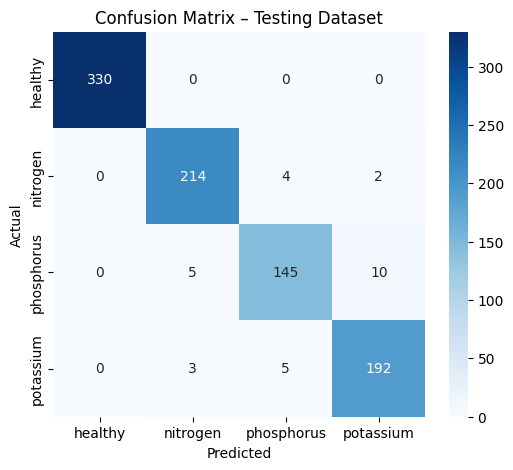

healthy Accuracy: 100.00%
nitrogen Accuracy: 97.27%
phosphorus Accuracy: 90.62%
potassium Accuracy: 96.00%


In [23]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Evaluate
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"✅ Testing Accuracy: {test_accuracy*100:.2f}%")

# Predictions
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Testing Dataset")
plt.show()

# Per-class accuracy
for i, class_name in enumerate(class_names):
    acc = np.mean(y_pred[y_true == i] == i)
    print(f"{class_name} Accuracy: {acc*100:.2f}%")


In [24]:
results_df = pd.DataFrame({
    "Actual": [class_names[i] for i in y_true],
    "Predicted": [class_names[i] for i in y_pred]
})

results_df.to_csv("/content/drive/MyDrive/testing_results_finetuned.csv", index=False)
print("✅ Testing results saved to Drive")


✅ Testing results saved to Drive
